# Annotating the Gas Leaks
By following the steps below .xml files can be created for object detection training.
This will also make new gas renders locally to be superimposed on thermal images that will be annotated.

In [1]:
# Get necessary  files
!git clone https://github.com/jackstein21/SummerProject23.git setup
%cd setup
!wget https://github.com/max-wild/gas_rendering/raw/main/gas_scene.blend
%cd ..

Cloning into 'setup'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 180 (delta 34), reused 0 (delta 0), pack-reused 119
Receiving objects: 100% (180/180), 19.25 MiB | 10.10 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/setup
--2023-07-25 14:17:45--  https://github.com/max-wild/gas_rendering/raw/main/gas_scene.blend
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/max-wild/Thermal-Gas-Rendering/raw/main/gas_scene.blend [following]
--2023-07-25 14:17:45--  https://github.com/max-wild/Thermal-Gas-Rendering/raw/main/gas_scene.blend
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/max-wild/Thermal-Gas-Rendering/main/gas_scen

In [2]:
from google.colab import drive
import os
from math import ceil
import re
import csv
!pip install pascal-voc-writer
from pascal_voc_writer import Writer
from google.colab.patches import cv2_imshow
import cv2
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Set these variables to generate gas leak renders

render_out_dir = '/content/renders' # This is where the renders will be stored.
total_renders = 8 # Number of renders created


Download blender:

In [4]:
# Fix for a known bug when using blender with colab
import os

os.environ["LD_PRELOAD"] = ""

!apt remove libtcmalloc-minimal4
!apt install libtcmalloc-minimal4

os.environ["LD_PRELOAD"] = "/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0"
!apt install libboost-all-dev
!apt install libgl1-mesa-dev
!apt install libglu1-mesa libsm-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  google-perftools libgoogle-perftools4 libtcmalloc-minimal4
0 upgraded, 0 newly installed, 3 to remove and 8 not upgraded.
After this operation, 1,817 kB disk space will be freed.
(Reading database ... 129824 files and directories currently installed.)
Removing google-perftools (2.9.1-0ubuntu3) ...
Removing libgoogle-perftools4:amd64 (2.9.1-0ubuntu3) ...
Removing libtcmalloc-minimal4:amd64 (2.9.1-0ubuntu3) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libtcmalloc-minimal4
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 98.2 kB of archives.
After this operation, 382 kB of additional disk space will be used.
Get:1 http://arch

In [5]:
%%shell

BLEND_DIR="/blender-3.2.2-linux-x64/"

# Download blender zip
if [ ! -f "blender-3.2.2-linux-x64.tar.xz" ]; then
  wget -nc https://download.blender.org/release/Blender3.2/blender-3.2.2-linux-x64.tar.xz
fi

# If the blend tar hasn't been unzipped, then unzip it
[ ! -d "$BLEND_DIR" ] && tar -xf blender-3.2.2-linux-x64.tar.xz

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
--2023-07-25 14:18:16--  https://download.blender.org/release/Blender3.2/blender-3.2.2-linux-x64.tar.xz
Resolving download.blender.org (download.blender.org)... 82.94.213.221
Connecting to download.blender.org (download.blender.org)|82.94.213.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191760080 (183M) [application/octet-stream]
Saving to: ‘blender-3.2.2-linux-x64.tar.xz’

blender-3.2.2-linux 100%[===================>] 182.88M  9.44MB/s    in 15s     

2023-07-25 14:18:31 (12.0 MB/s) - ‘blender-3.2.2-linux-x64.tar.xz’ saved [191760080/191760080]

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD canno

The block below will generate thermal gas images:

In [6]:
blend_dir = '/content/blender-3.2.2-linux-x64/blender'
four_renders = ceil(total_renders / 4)  # How many times 4 gas images are generated

# Shell command to render gas images
!{blend_dir} setup/gas_scene.blend --background --python setup/render_images_with_coords.py -- -o {render_out_dir} -r {four_renders}

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
Blender 3.2.2 (hash bcfdb14560e7 built 2022-08-02 23:38:01)
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
Read blend: /content/setup/gas_scene.blend
<bpy_struct, CyclesPreferences at 0x7c71f0d8d3c8>
Device found CUDA

Starting to render 8 gas images...
Info: Fluid: Bake All complete! (78.21)
Emitter Location: <Vector (1.1862, 0.0951, -1.7700)>
Pixel coordinants: (135, 167)
Fra:20 Mem:9.10M (Peak 9.13M) | Time:00:00.13 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | Smoke Domain
Fra:20 Mem:9.10M (Peak 9.13M) | Time:00:00.14 | Mem:0.00M, Peak:0.00M | 

Creating annotations
- Varibles "a_out_dir", "number", and "mode" are the only ones that should be changed based on prefereance. Leaving as is is good for proof of concept


In [7]:
inp_dir = '/content/setup/generate_annotation_data.py' # Path of python file to make annotations
backgrounds = '/content/setup/backgrounds' # Location of background images
number = 8 # Number of annoations to make
coords_df = '/content/emission_coordinates.csv' # Location of coordinate .csv file
a_out_dir = '/content/test' # Folder where annotations will be stored
mode = 3 # Sets annotation mode. 1) annotations from mask, 2) annotation from coordinates, 3) both annotation types
!python {inp_dir} -b {backgrounds} -s {render_out_dir} -o {a_out_dir} -n {number} -c {coords_df} -a {mode}

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc_minimal.so.4.3.0' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
Generating 8 frames/masks...


Visualization of 2 annotations

In [8]:
# Path of images
img1, img2 = "003","005"



im1 = cv2.imread(cv2.samples.findFile(f"/content/test/frames/frame{img1}.jpg"))
im1m = cv2.imread(cv2.samples.findFile(f"/content/test/masks/mask_{img1}.jpg"))
if mode != 3:
  im1a = cv2.imread(cv2.samples.findFile(f"/content/test/annotated/annotated_{img1}.jpg"))
else:
  im1a = cv2.imread(cv2.samples.findFile(f"/content/test/annotated/annotated1_{img1}.jpg"))

im2 = cv2.imread(cv2.samples.findFile(f"/content/test/frames/frame{img2}.jpg"))
im2m = cv2.imread(cv2.samples.findFile(f"/content/test/masks/mask_{img2}.jpg"))
if mode != 3:
  im2a = cv2.imread(cv2.samples.findFile(f"/content/test/annotated/annotated_{img2}.jpg"))
else:
  im2a = cv2.imread(cv2.samples.findFile(f"/content/test/annotated/annotated1_{img2}.jpg"))


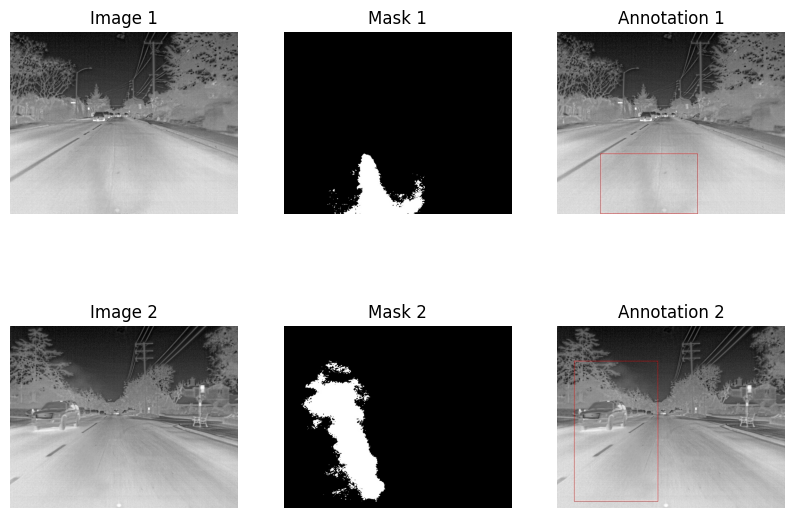

In [9]:
# Create figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

# Add images to each subplot
axes[0, 0].imshow(im1)
axes[0, 1].imshow(im1m)
axes[0, 2].imshow(im1a)
axes[1, 0].imshow(im2)
axes[1, 1].imshow(im2m)
axes[1, 2].imshow(im2a)

# Remove x and y axes from each subplot
for ax in axes.flat:
    ax.axis('off')

# Add titles to each subplot
axes[0, 0].set_title("Image 1")
axes[0, 1].set_title("Mask 1")
axes[0, 2].set_title("Annotation 1")
axes[1, 0].set_title("Image 2")
axes[1, 1].set_title("Mask 2")
axes[1, 2].set_title("Annotation 2")


# Show the figure
plt.show()
